<a href="https://colab.research.google.com/github/Omarnot2far/projects/blob/main/Football_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install mplsoccer


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch


In [49]:
#importing the data parser through mplsoccer (alternative to the official statsbombpy package)
parser  = Sbopen()

In [50]:
competitions = parser.competition()

In [51]:
competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             74 non-null     int64 
 1   season_id                  74 non-null     int64 
 2   country_name               74 non-null     object
 3   competition_name           74 non-null     object
 4   competition_gender         74 non-null     object
 5   competition_youth          74 non-null     bool  
 6   competition_international  74 non-null     bool  
 7   season_name                74 non-null     object
 8   match_updated              74 non-null     object
 9   match_updated_360          56 non-null     object
 10  match_available_360        10 non-null     object
 11  match_available            74 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 6.1+ KB


In [52]:
competitions.head(25)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
5,16,2,Europe,Champions League,male,False,False,2016/2017,2024-02-13T02:37:32.205154,2021-06-13T16:17:31.694,None,2024-02-13T02:37:32.205154
6,16,27,Europe,Champions League,male,False,False,2015/2016,2024-06-12T07:45:38.786894,2021-06-13T16:17:31.694,None,2024-06-12T07:45:38.786894
7,16,26,Europe,Champions League,male,False,False,2014/2015,2024-02-12T12:49:54.914228,2021-06-13T16:17:31.694,None,2024-02-12T12:49:54.914228
8,16,25,Europe,Champions League,male,False,False,2013/2014,2024-02-12T12:48:48.479157,2021-06-13T16:17:31.694,None,2024-02-12T12:48:48.479157
9,16,24,Europe,Champions League,male,False,False,2012/2013,2024-02-12T12:47:34.340413,2021-06-13T16:17:31.694,None,2024-02-12T12:47:34.340413


In [53]:
competitions['competition_name'].unique()

array(['1. Bundesliga', 'African Cup of Nations', 'Champions League',
       'Copa America', 'Copa del Rey', "FA Women's Super League",
       'FIFA U20 World Cup', 'FIFA World Cup', 'Indian Super league',
       'La Liga', 'Liga Profesional', 'Ligue 1', 'Major League Soccer',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [54]:
competitions['season_name'].unique()

array(['2023/2024', '2015/2016', '2023', '2018/2019', '2017/2018',
       '2016/2017', '2014/2015', '2013/2014', '2012/2013', '2011/2012',
       '2010/2011', '2009/2010', '2008/2009', '2006/2007', '2004/2005',
       '2003/2004', '1999/2000', '1972/1973', '1971/1972', '1970/1971',
       '2024', '1983/1984', '1982/1983', '1977/1978', '2020/2021',
       '2019/2020', '1979', '2022', '2018', '1990', '1986', '1974',
       '1970', '1962', '1958', '2021/2022', '2007/2008', '2005/2006',
       '1973/1974', '1997/1998', '1981', '2022/2023', '1977', '1986/1987',
       '2020', '1988/1989', '2019'], dtype=object)

In [55]:
competitions[competitions.competition_name=='UEFA Europa League']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250


In [56]:
competitions[competitions.season_name=='2023/2024']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676


In [57]:
df_match = parser.match(competition_id=9, season_id=281)
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         34 non-null     int64         
 1   match_date                       34 non-null     datetime64[ns]
 2   kick_off                         34 non-null     datetime64[ns]
 3   home_score                       34 non-null     int64         
 4   away_score                       34 non-null     int64         
 5   match_status                     34 non-null     object        
 6   match_status_360                 34 non-null     object        
 7   last_updated                     34 non-null     datetime64[ns]
 8   last_updated_360                 34 non-null     datetime64[ns]
 9   match_week                       34 non-null     int64         
 10  competition_id                   34 non-null     int64         


In [58]:
df_match.head(5)

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3895302,2024-04-14,2024-04-14 17:30:00,5,0,available,available,2024-05-10 16:57:53.017895,2024-05-10 17:03:59.613154,29,...,1,Regular Season,377,BayArena,85,Germany,234,Harm Osmers,85,Germany
1,3895292,2024-04-06,2024-04-06 15:30:00,0,1,available,available,2024-05-12 21:04:50.061716,2024-05-12 21:08:37.897296,28,...,1,Regular Season,560,Stadion An der Alten Försterei,85,Germany,235,Benjamin Brand,85,Germany
2,3895333,2024-05-05,2024-05-05 18:30:00,1,5,available,available,2024-05-14 16:23:06.325967,2024-05-14 16:32:13.483516,32,...,1,Regular Season,116458,Deutsche Bank Park,85,Germany,237,Christian Dingert,85,Germany
3,3895340,2024-05-12,2024-05-12 20:30:00,0,5,available,available,2024-05-14 10:09:25.875345,2024-05-14 16:46:08.459843,33,...,1,Regular Season,550,Vonovia Ruhrstadion,85,Germany,235,Benjamin Brand,85,Germany
4,3895348,2024-05-18,2024-05-18 16:30:00,2,1,available,available,2024-05-20 10:11:27.857660,2024-05-20 10:33:09.140760,34,...,1,Regular Season,377,BayArena,85,Germany,837,Matthias Jöllenbeck,85,Germany


In [59]:
df_event, df_related, df_freeze, df_tactics = parser.event(3895302)

# exploring the data
df_event.info()
df_related.info()
df_freeze.info()
df_tactics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4223 non-null   object 
 1   index                           4223 non-null   int64  
 2   period                          4223 non-null   int64  
 3   timestamp                       4223 non-null   object 
 4   minute                          4223 non-null   int64  
 5   second                          4223 non-null   int64  
 6   possession                      4223 non-null   int64  
 7   duration                        3068 non-null   float64
 8   match_id                        4223 non-null   int64  
 9   type_id                         4223 non-null   int64  
 10  type_name                       4223 non-null   object 
 11  possession_team_id              4223 non-null   int64  
 12  possession_team_name            42

In [60]:
df_event.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_name,block_save_block,shot_one_on_one,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,pass_cut_back,pass_goal_assist,dribble_nutmeg
0,794ec549-5288-4d1a-93e8-0fc6d3968784,1,1,00:00:00,0,0,1,0.000000,3895302,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3a9a2c57-b177-47ed-9447-11f081b0e388,2,1,00:00:00,0,0,1,0.000000,3895302,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1f956a2b-ece0-475b-8802-e82ed922c307,3,1,00:00:00,0,0,1,0.000000,3895302,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,79b90fbb-2cfd-419b-90f4-f0e5980c47d3,4,1,00:00:00,0,0,1,0.000000,3895302,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,221b0c8d-6386-4ae8-bb4a-a1dc98742312,5,1,00:00:03.417000,0,3,2,0.453249,3895302,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_event['team_name'].unique()

array(['Bayer Leverkusen', 'Werder Bremen'], dtype=object)

# Passes_by_player

In [62]:
passes_by_player = df_event[df_event['type_name'] == 'Pass'].groupby(['team_name', 'player_name'])['id'].count().reset_index(name='pass_count')
print(passes_by_player)


           team_name                  player_name  pass_count
0   Bayer Leverkusen    Alejandro Grimaldo García          10
1   Bayer Leverkusen                   Amine Adli          21
2   Bayer Leverkusen        Edmond Fayçal Tapsoba          87
3   Bayer Leverkusen  Exequiel Alejandro Palacios          17
4   Bayer Leverkusen                Florian Wirtz          27
5   Bayer Leverkusen                 Granit Xhaka          85
6   Bayer Leverkusen             Jeremie Frimpong           8
7   Bayer Leverkusen                Jonas Hofmann          46
8   Bayer Leverkusen                 Jonathan Tah          74
9   Bayer Leverkusen               Lukáš Hrádecký          24
10  Bayer Leverkusen                 Nathan Tella          24
11  Bayer Leverkusen              Odilon Kossonou          77
12  Bayer Leverkusen                Patrik Schick           6
13  Bayer Leverkusen  Piero Martín Hincapié Reyna          42
14  Bayer Leverkusen               Robert Andrich          88
15  Baye

In [63]:
def generatePlayerPassMapsGrid(team_name):
    # filtering to passes by team_name players
    team_passes = (df_event.type_name == 'Pass') & (df_event.team_name == team_name) & (df_event.sub_type_name != "Throw-in")
    # selecting only relevant columsn for the pass map
    team_passes = df_event.loc[team_passes, ['x', 'y', 'end_x', 'end_y', 'player_name','outcome_name']]
    #get the list of all players who made a pass
    names = team_passes['player_name'].unique()
    #draw 4x4 pitches
    pitch = Pitch(line_color='white',pitch_color='#02540b',pad_top=20)
    fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,endnote_height=0.04, title_space=0.04, endnote_space=0.01)
    plt.figure(figsize=(14,10))
    #for each player
    for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
        #take only passes by this player
        player_df = team_passes.loc[team_passes["player_name"] == name]
        #put player name over the plot
        ax.text(60, -10, name.split()[0]+":"+str(len(player_df))+" passes",ha='center', va='center', fontsize=14)
        #scatter -  plots the player position with 0.2 alpha(visibility)
        #pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
        #plot pass arrows
        #pitch.arrows(player_df.x, player_df.y,player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)
        # plotting arrows one by one, red or green based on if its incomplete or not
        for i in player_df.index:
            x=player_df['x'][i]
            y = player_df['y'][i]
            dx = player_df['end_x'][i] - player_df['x'][i]
            dy = player_df['end_y'][i] - player_df['y'][i]
            if df_event['outcome_name'][i] != 'Incomplete':
                ax.arrow(x,y,dx,dy,color='#0dff00',length_includes_head=True,head_width=1,head_length=0.8)
                pitch.scatter(player_df['x'][i],player_df['y'][i],color='#0dff00',ax=ax)
            else:
                ax.arrow(x,y,dx,dy,color='red',length_includes_head=True,head_width=1,head_length=0.8)
                pitch.scatter(player_df['x'][i],player_df['y'][i],color='red',ax=ax)


    #We have more than enough pitches - remove them
    for ax in axs['pitch'][-1, 25 - len(names):]:
        ax.remove(ax)

    #Another way to set title using mplsoccer
    axs['title'].text(0.5, 0.5, team_name+" pass maps", ha='center', va='center', fontsize=20)

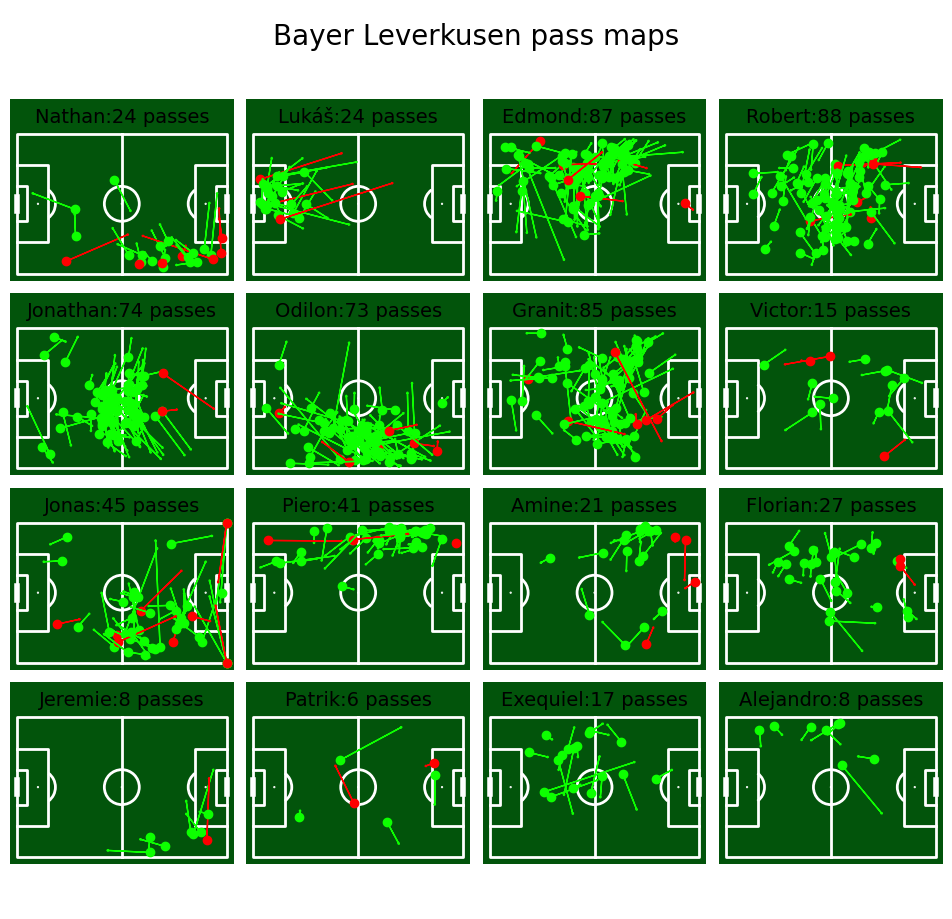

<Figure size 1400x1000 with 0 Axes>

In [64]:
generatePlayerPassMapsGrid('Bayer Leverkusen')

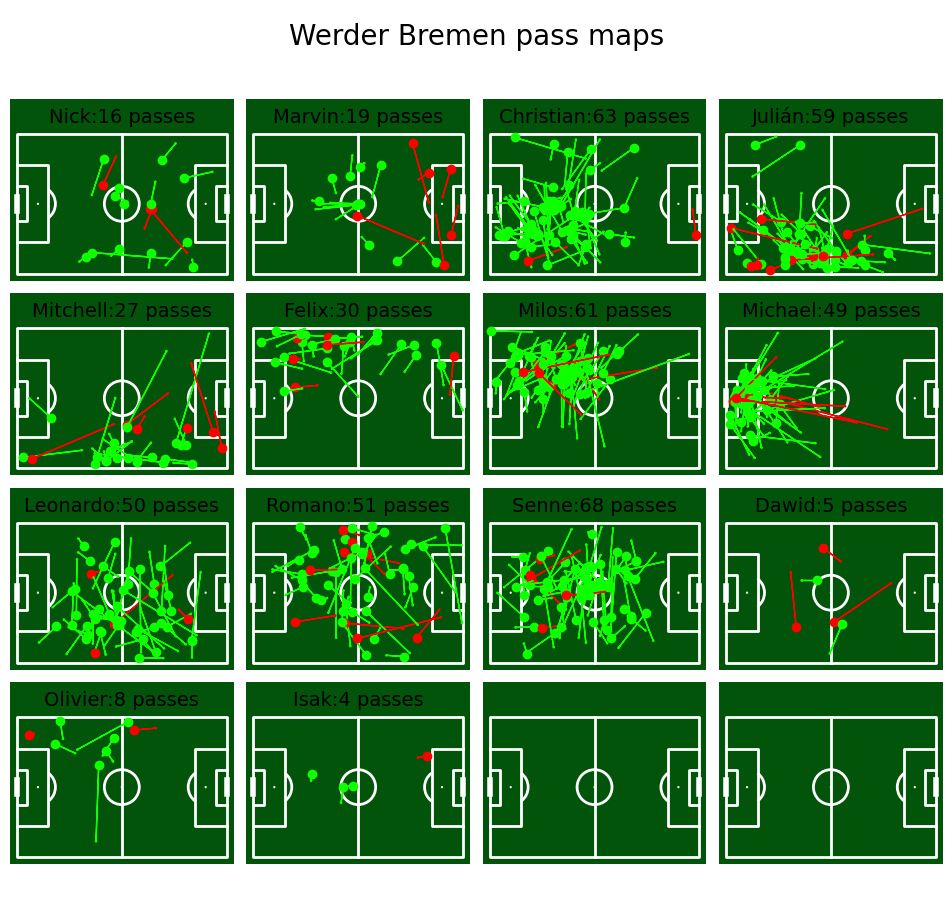

<Figure size 1400x1000 with 0 Axes>

In [65]:
generatePlayerPassMapsGrid('Werder Bremen')

In [66]:
# to take a better look at player pass map
def generatePlayerPassMap(player_name):
    player_filter = (df_event.type_name == 'Pass') & (df_event.player_name == player_name)
    player_df = df_event.loc[player_filter, ['x', 'y', 'end_x', 'end_y']]

    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    for i in player_df.index:
        x = player_df['x'][i]
        y = player_df['y'][i]
        dx = player_df['end_x'][i] - player_df['x'][i]
        dy = player_df['end_y'][i] - player_df['y'][i]
        if df_['outcome_name'][i] != 'Incomplete':
            ax['pitch'].arrow(x,y,dx,dy,color='#0dff00',length_includes_head=True,head_width=1,head_length=0.8)
            pitch.scatter(player_df['x'][i],player_df['y'][i],color='#0dff00',ax=ax['pitch'])
        else:
            ax['pitch'].arrow(x,y,dx,dy,color='red',length_includes_head=True,head_width=1,head_length=0.8)
            pitch.scatter(player_df['x'][i],player_df['y'][i],color='red',ax=ax['pitch'])
    fig.suptitle(player_name+" passes", fontsize = 20)

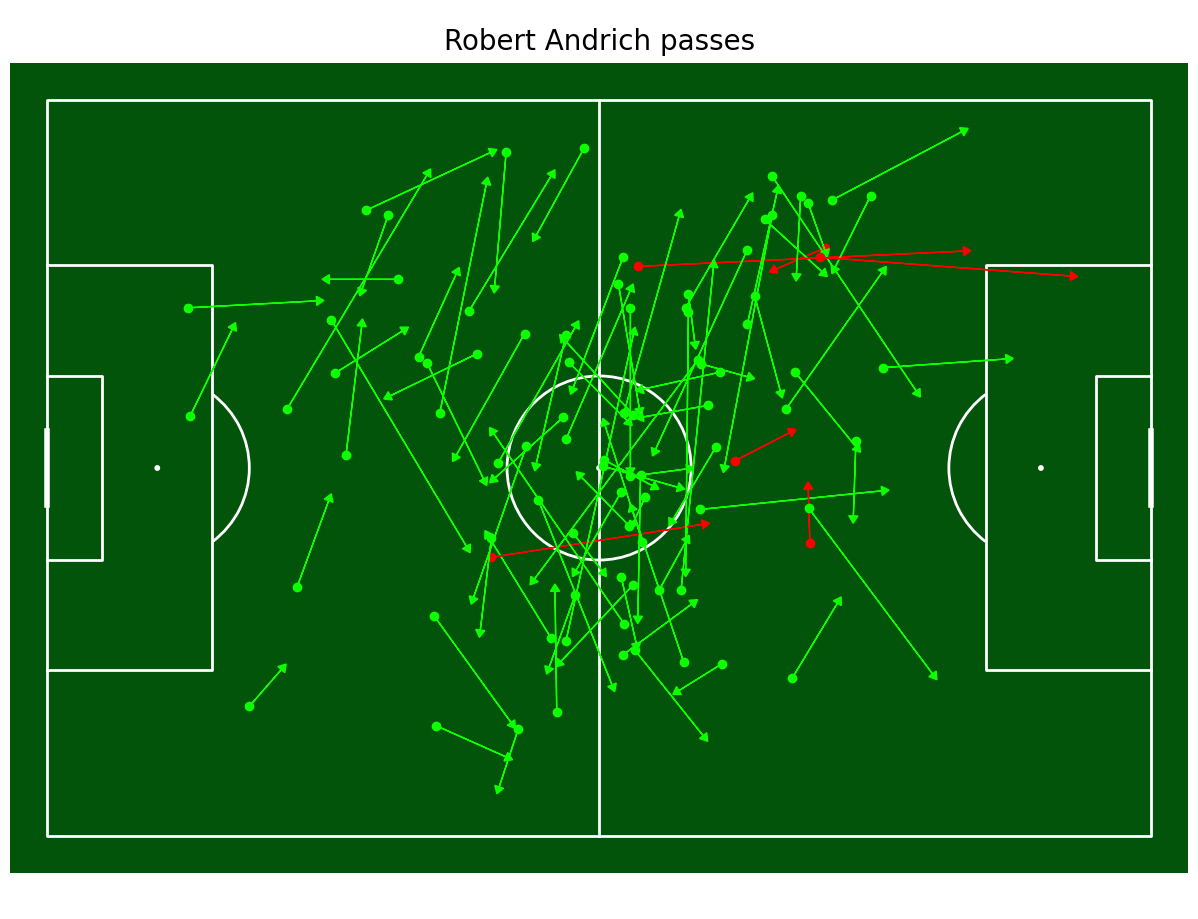

In [67]:
# we can do this for all players individually
generatePlayerPassMap("Robert Andrich")

# generate Team Passing Network

In [72]:


def generatePassingNetwork(team_name):
    #check for index of first sub
    sub = df_event.loc[df_event["type_name"] == "Substitution"].loc[df_event["team_name"] == team_name].iloc[0]["index"]
    #make df with successfull passes by Real Madrid until the first substitution
    rm_passes = (df_event.type_name == 'Pass') & (df_event.team_name == team_name) & (df_event.index < sub) & (df_event.outcome_name.isnull()) & (df_event.sub_type_name != "Throw-in")
    #taking necessary columns
    rm_pass = df_event.loc[rm_passes, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
    #adjusting that only the surname of a player is presented.
    rm_pass["player_name"] = rm_pass["player_name"].apply(lambda x: str(x).split()[-1])
    rm_pass["pass_recipient_name"] = rm_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

    scatter_df = pd.DataFrame()
    for i, name in enumerate(rm_pass["player_name"].unique()):
        passx = rm_pass.loc[rm_pass["player_name"] == name]["x"].to_numpy()
        recx = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
        passy = rm_pass.loc[rm_pass["player_name"] == name]["y"].to_numpy()
        recy = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
        scatter_df.at[i, "player_name"] = name
        #make sure that x and y location for each circle representing the player is the average of passes and receptions
        scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
        #calculate number of passes
        scatter_df.at[i, "no"] = rm_pass.loc[rm_pass["player_name"] == name].count().iloc[0]
    #adjust the size of a circle so that the player who made more passes
    scatter_df['marker_size'] = (scatter_df["no"] / scatter_df["no"].max() * 1500)

    #counting passes between players
    rm_pass["pair_key"] = rm_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
    lines_df = rm_pass.groupby(["pair_key"]).x.count().reset_index()
    lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
    #setting a threshold. You can try to investigate how it changes when you change it.
    lines_df = lines_df[lines_df['pass_count']>2]

    #plot once again pitch and vertices
    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='#2f5fed', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
    for i, row in scatter_df.iterrows():
        pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
    for i, row in lines_df.iterrows():
            player1 = row["pair_key"].split("_")[0]
            player2 = row['pair_key'].split("_")[1]
            #take the average location of players to plot a line between them
            player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
            player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
            player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
            player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
            num_passes = row["pass_count"]
            #adjust the line width so that the more passes, the wider the line
            line_width = (num_passes / lines_df['pass_count'].max() * 10)
            #plot lines on the pitch
            pitch.lines(player1_x, player1_y, player2_x, player2_y,
                            alpha=1, lw=line_width, zorder=2, color="#2f5fed", ax = ax["pitch"])
    fig.suptitle(team_name+"'s Passing Network", fontsize = 20)



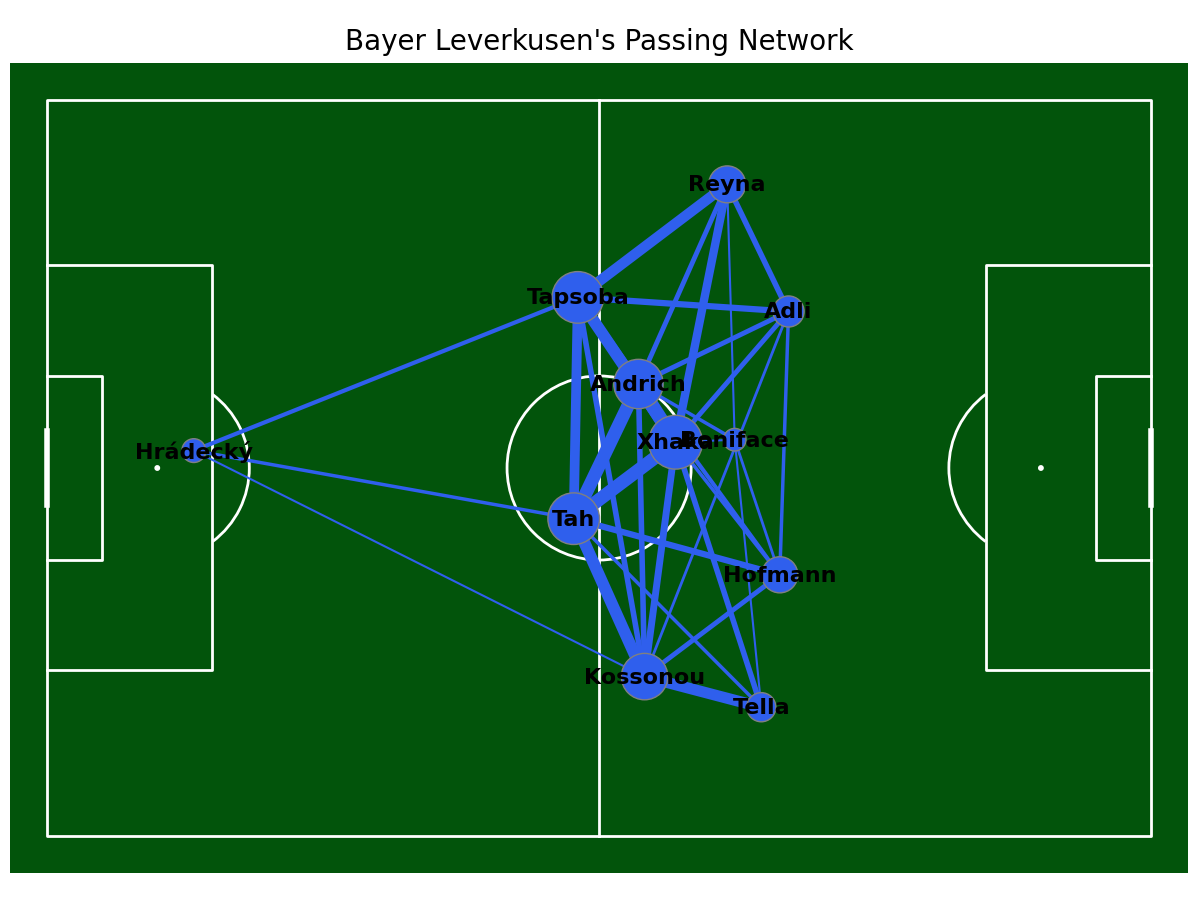

In [73]:
generatePassingNetwork('Bayer Leverkusen')


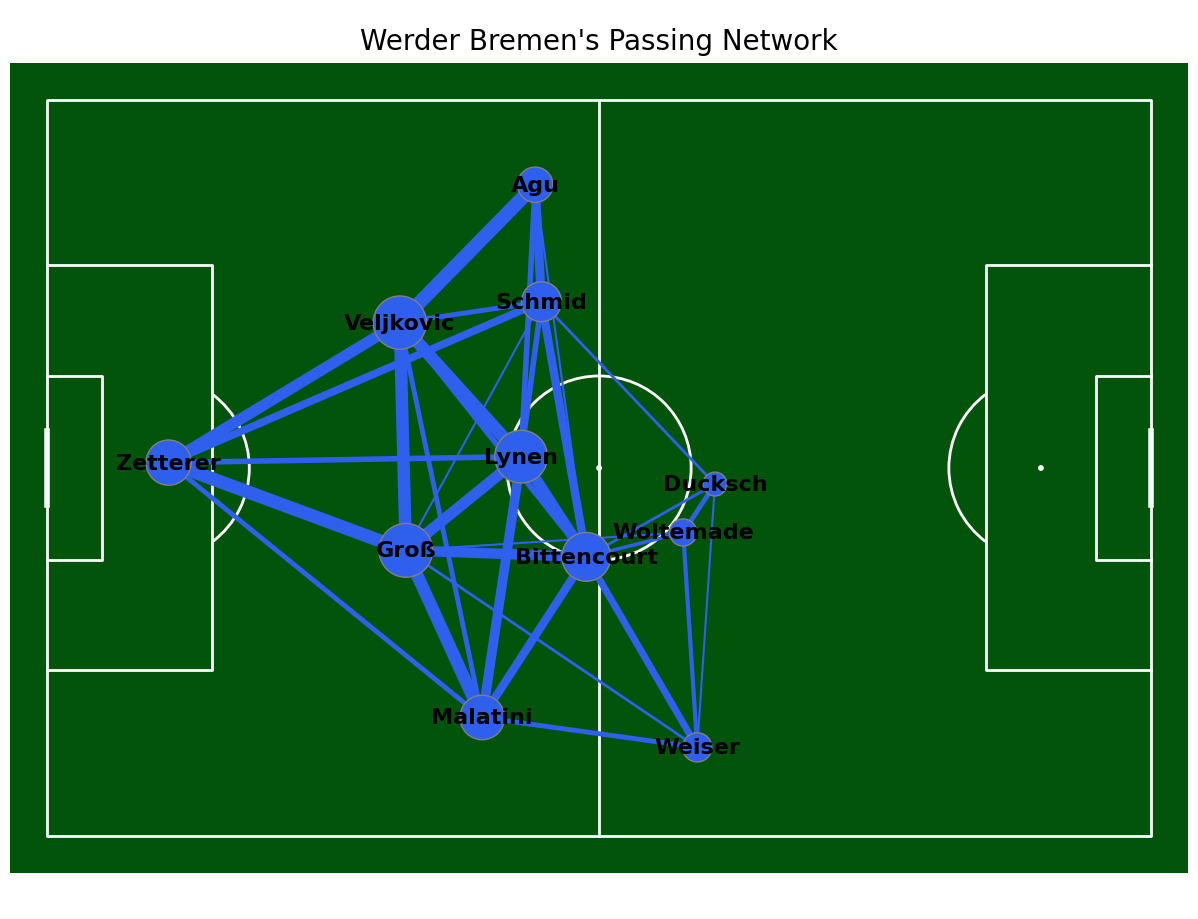

In [74]:
generatePassingNetwork('Werder Bremen')

# expected goals (xG)
expected goals (xG) is a performance metric used to evaluate team and player performances. It can be used to represent the probability of a scoring opportunity that may result in a goal.
An xG value above 0.38 for a specific shot is considered a big chance.

In [78]:
import seaborn as sns
def generateTeamxGDataFrame(team_name):
    xg = df_event[['team_name','minute','type_name','shot_statsbomb_xg','x','y']]
    team_xg = xg[xg['team_name']==team_name].reset_index()
    return team_xg

In [81]:
def generatexGPlot(team_name):
    team_xg = generateTeamxGDataFrame(team_name)
    #xg_events[xg_events.shot_statsbomb_xg.isna()==False]
    plt.clf()
    sns.lineplot(data=team_xg,x='minute',y='shot_statsbomb_xg',errorbar=None)
    plt.xlabel("Minutes")
    plt.ylabel("xG")
    plt.title("xG/Minute for "+ team_name)
    plt.show()

<ipython-input-79-39e899bd3a69>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=team_xg,x='minute',y='shot_statsbomb_xg',ci=None)


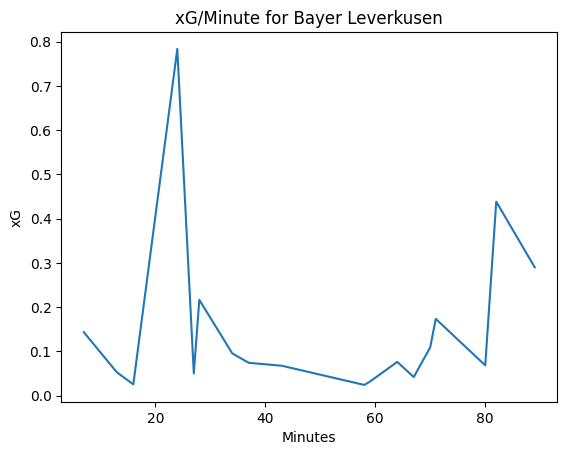

In [80]:
generatexGPlot('Bayer Leverkusen')

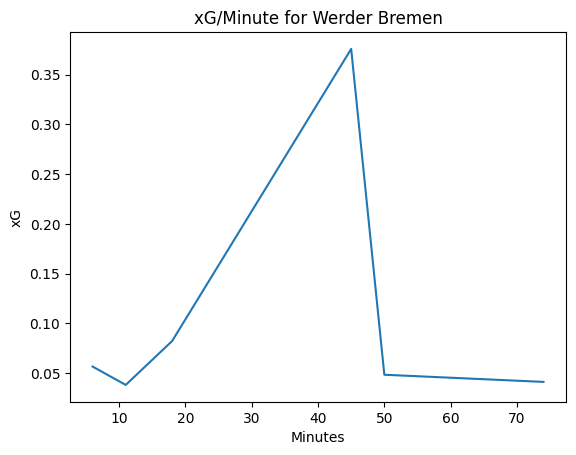

In [82]:
generatexGPlot('Werder Bremen')

In [83]:
def generateCombinedShotMap(team1,team2):
    team1_xg = generateTeamxGDataFrame(team1)
    team2_xg = generateTeamxGDataFrame(team2)
    team1_shots = team1_xg[team1_xg.type_name=='Shot']
    team2_shots = team2_xg[team2_xg.type_name=='Shot']
    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(team1_shots.x, team1_shots.y, alpha = 0.3, s = team1_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)
    pitch.scatter(120-team2_shots.x, 80-team2_shots.y, alpha = 0.3, s = team2_shots.shot_statsbomb_xg*5000, color = "blue", ax=ax['pitch'],)
    ax['pitch'].text(5, 5, team2 + ' shots',color='white',size=20)
    ax['pitch'].text(80, 5, team1 + ' shots',color='white',size=20)

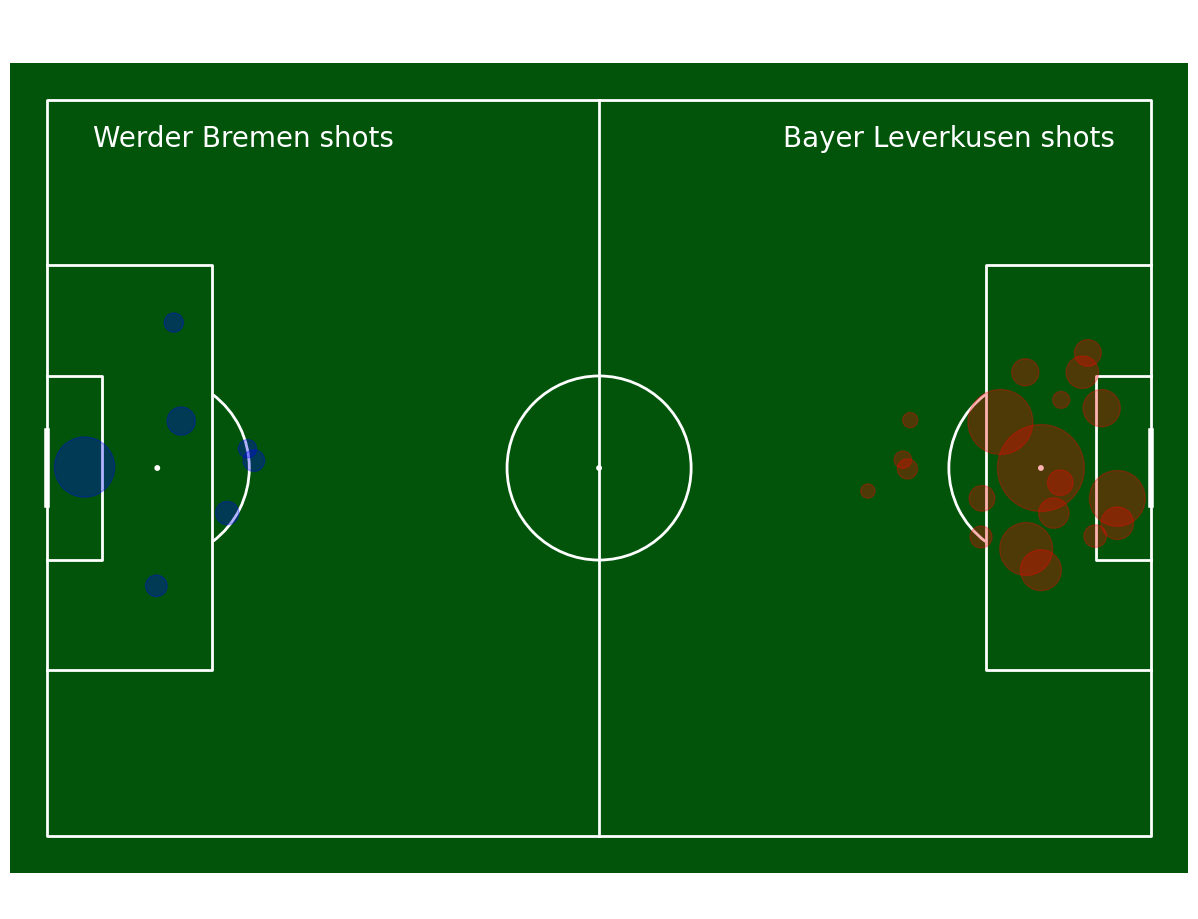

In [84]:
generateCombinedShotMap('Bayer Leverkusen','Werder Bremen')

In [85]:
def generateTeamShotMap(team_name):
    team1_xg = generateTeamxGDataFrame(team_name)
    team1_shots = team1_xg[team1_xg.type_name=='Shot']
    pitch = Pitch(line_color='white',pitch_color='#02540b',half=True)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(team1_shots.x, team1_shots.y, alpha = 0.3, s = team1_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)
    ax['pitch'].text(80, 5, team_name + ' shots',color='white',size=20)

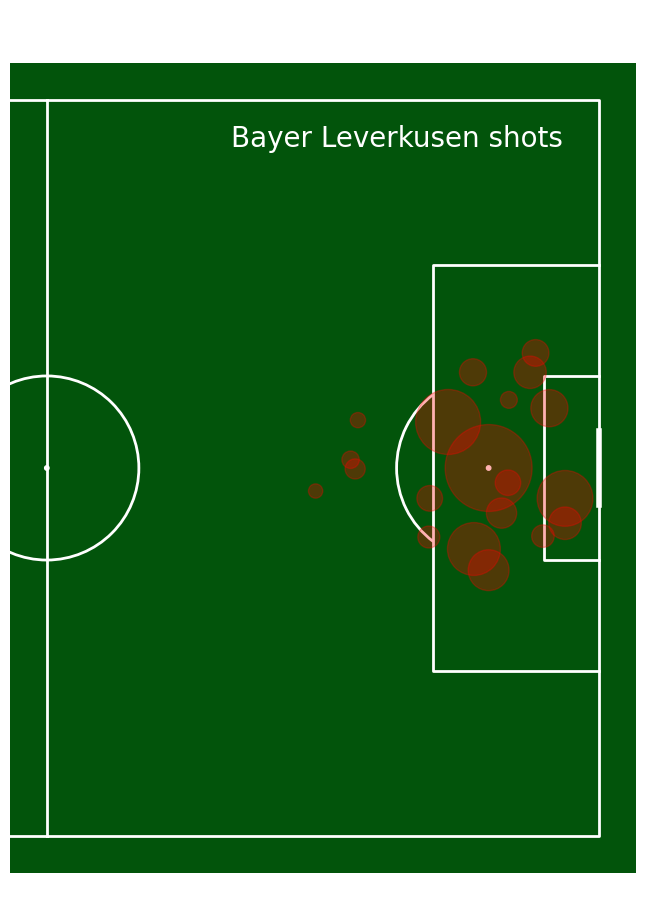

In [86]:
generateTeamShotMap('Bayer Leverkusen')

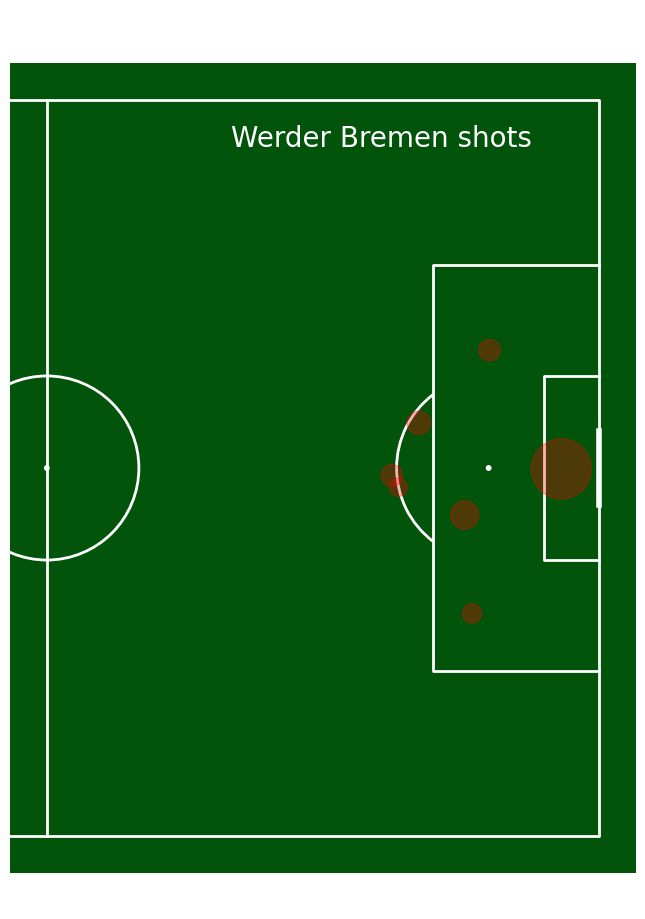

In [87]:
generateTeamShotMap('Werder Bremen')

#Player Performance Analysis:

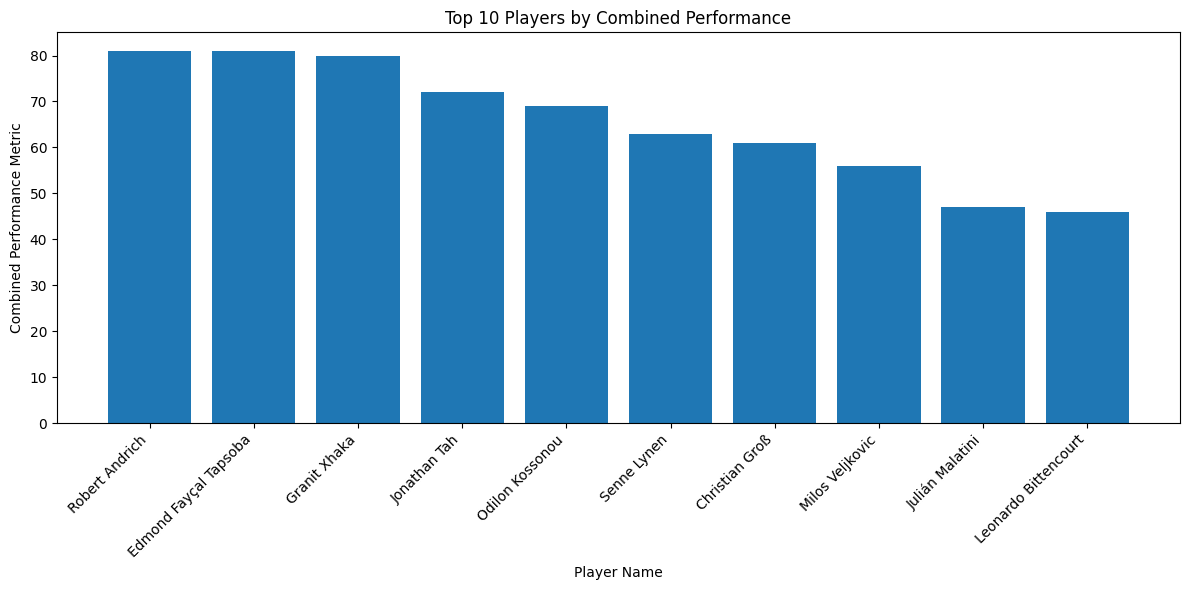

In [89]:

# Analyze the top players based on metrics like successful passes, shots on target, and goals scored.
# Create a bar chart or a scatter plot to visualize the top players' performance.

import matplotlib.pyplot as plt
# Calculate player performance metrics
player_stats = df_event[(df_event['type_name'] == 'Pass') & (df_event['outcome_name'].isnull())].groupby('player_name')['id'].count().reset_index(name='successful_passes')
shots_on_target = df_event[(df_event['type_name'] == 'Shot') & (df_event['outcome_name'] == 'Goal')].groupby('player_name')['id'].count().reset_index(name='shots_on_target')
goals_scored = df_event[(df_event['type_name'] == 'Shot') & (df_event['outcome_name'] == 'Goal')].groupby('player_name')['id'].count().reset_index(name='goals_scored')

# Merge the metrics into a single DataFrame
player_stats = player_stats.merge(shots_on_target, on='player_name', how='left').merge(goals_scored, on='player_name', how='left')
player_stats.fillna(0, inplace=True)

# Sort players by a combined metric (e.g., sum of successful passes, shots on target, and goals)
player_stats['combined_metric'] = player_stats['successful_passes'] + player_stats['shots_on_target'] + player_stats['goals_scored']
top_players = player_stats.sort_values('combined_metric', ascending=False).head(10)

# Create a bar chart to visualize top players' performance
plt.figure(figsize=(12, 6))
plt.bar(top_players['player_name'], top_players['combined_metric'])
plt.xlabel('Player Name')
plt.ylabel('Combined Performance Metric')
plt.title('Top 10 Players by Combined Performance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# possession time, number of attacks, and shot attempts

Bayer Leverkusen Possession: 49.65%
Werder Bremen Possession: 50.35%
Bayer Leverkusen Attacks: 1272
Werder Bremen Attacks: 975
Bayer Leverkusen Shot Attempts: 20
Werder Bremen Shot Attempts: 7


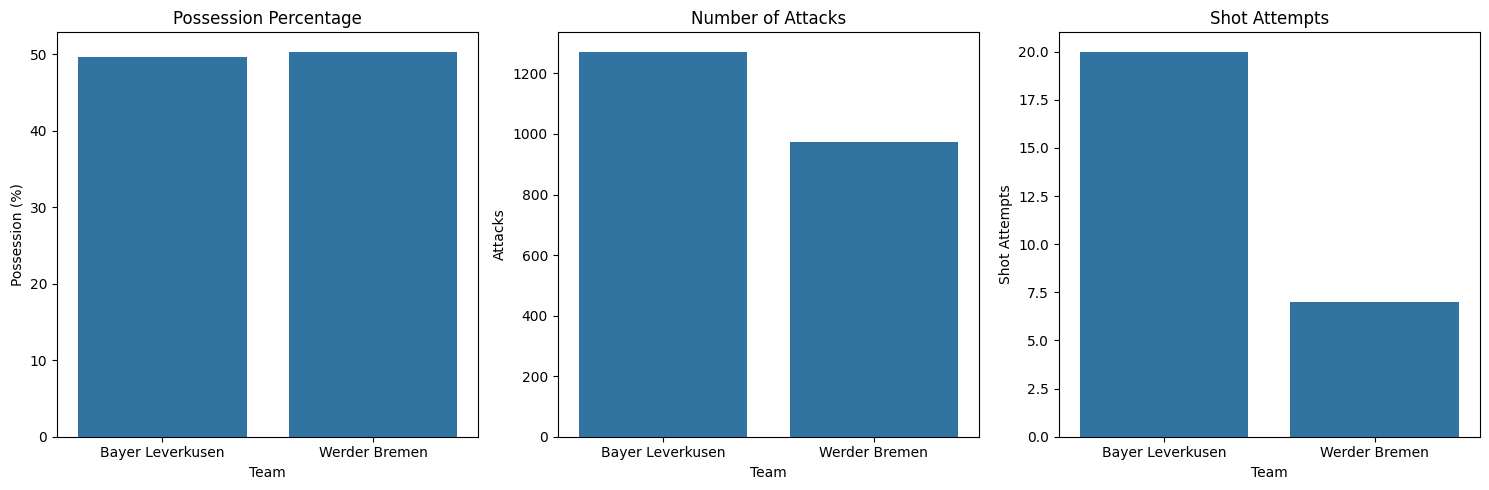

In [92]:
# prompt: Possession and Attacking Dynamics:
# Examine the possession statistics and team tactics, such as the average possession time, number of attacks, and shot attempts.

# Possession Statistics
possession_team1 = df_event[(df_event['possession_team_name'] == 'Bayer Leverkusen')]['possession'].nunique()
possession_team2 = df_event[(df_event['possession_team_name'] == 'Werder Bremen')]['possession'].nunique()
total_possessions = df_event['possession'].nunique()

possession_percentage_team1 = (possession_team1 / total_possessions) * 100
possession_percentage_team2 = (possession_team2 / total_possessions) * 100

print(f"Bayer Leverkusen Possession: {possession_percentage_team1:.2f}%")
print(f"Werder Bremen Possession: {possession_percentage_team2:.2f}%")

# Attacking Dynamics
attacks_team1 = df_event[(df_event['team_name'] == 'Bayer Leverkusen') & (df_event['type_name'].isin(['Shot', 'Pass', 'Dribble', 'Carry']))]['id'].count()
attacks_team2 = df_event[(df_event['team_name'] == 'Werder Bremen') & (df_event['type_name'].isin(['Shot', 'Pass', 'Dribble', 'Carry']))]['id'].count()

shot_attempts_team1 = df_event[(df_event['team_name'] == 'Bayer Leverkusen') & (df_event['type_name'] == 'Shot')]['id'].count()
shot_attempts_team2 = df_event[(df_event['team_name'] == 'Werder Bremen') & (df_event['type_name'] == 'Shot')]['id'].count()

print(f"Bayer Leverkusen Attacks: {attacks_team1}")
print(f"Werder Bremen Attacks: {attacks_team2}")
print(f"Bayer Leverkusen Shot Attempts: {shot_attempts_team1}")
print(f"Werder Bremen Shot Attempts: {shot_attempts_team2}")

# Visualize Possession and Attacking Metrics
data = {'Team': ['Bayer Leverkusen', 'Werder Bremen'],
        'Possession (%)': [possession_percentage_team1, possession_percentage_team2],
        'Attacks': [attacks_team1, attacks_team2],
        'Shot Attempts': [shot_attempts_team1, shot_attempts_team2]}

df_summary = pd.DataFrame(data)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='Team', y='Possession (%)', data=df_summary, ax=axes[0])
axes[0].set_title('Possession Percentage')

sns.barplot(x='Team', y='Attacks', data=df_summary, ax=axes[1])
axes[1].set_title('Number of Attacks')

sns.barplot(x='Team', y='Shot Attempts', data=df_summary, ax=axes[2])
axes[2].set_title('Shot Attempts')

plt.tight_layout()
plt.show()


# Defensive Analysis:

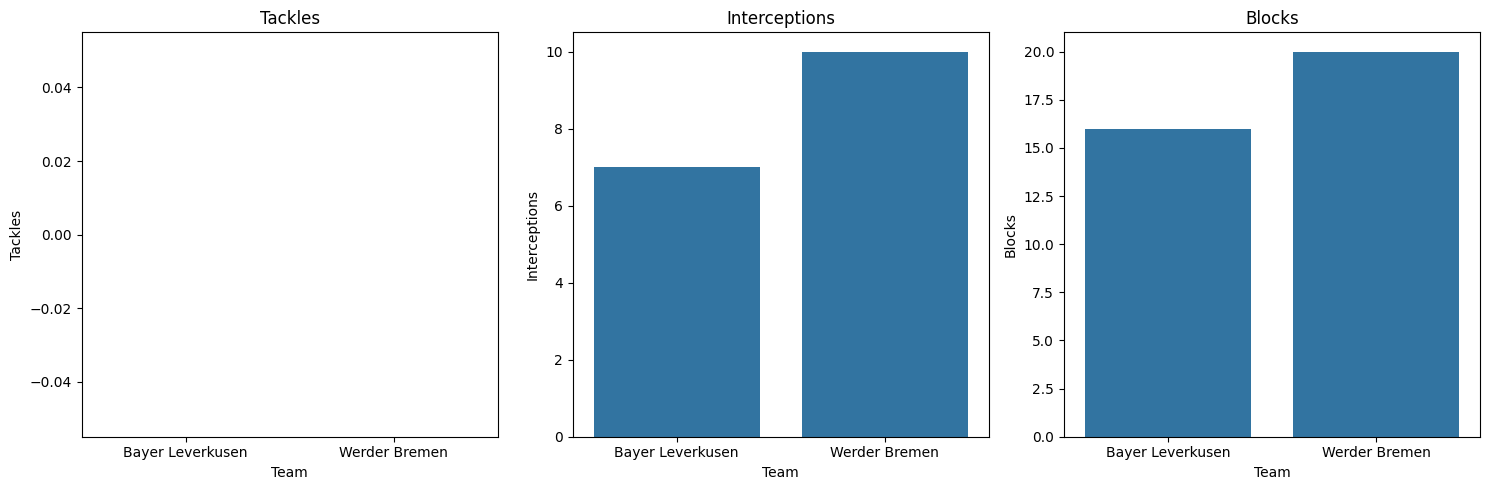

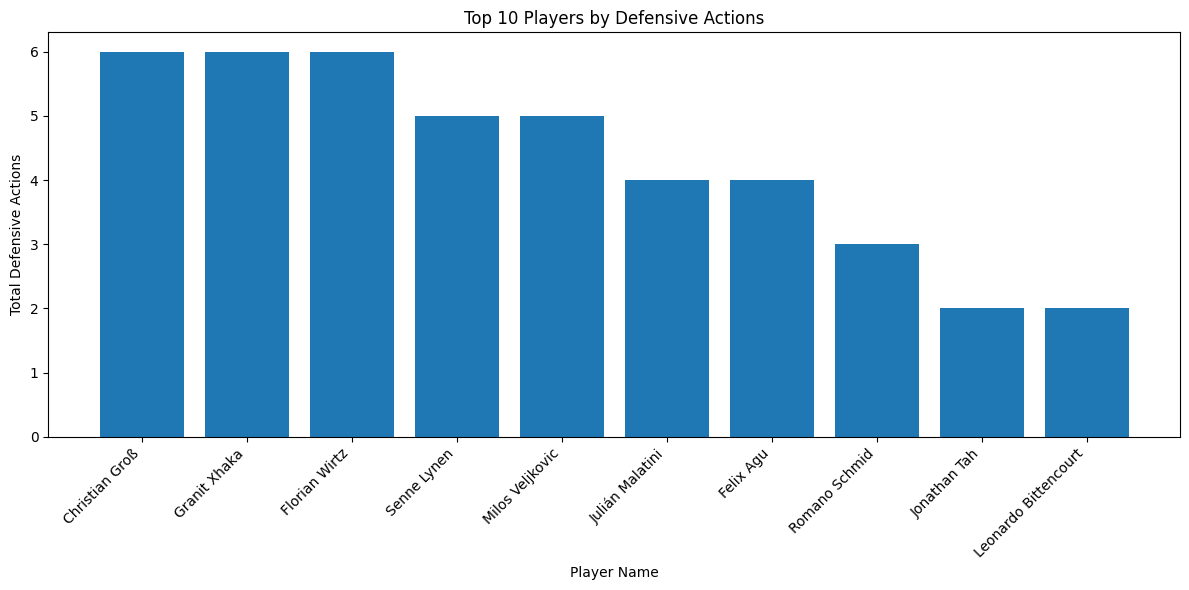

In [97]:
# prompt: Defensive Analysis:
# Analyze defensive actions, such as tackles, interceptions, and blocks, to understand the team's defensive strategies.
# Create chart to compare the defensive contributions of individual players or teams.

import pandas as pd
import matplotlib.pyplot as plt
# Defensive Actions
tackles_team1 = df_event[(df_event['team_name'] == 'Bayer Leverkusen') & (df_event['type_name'] == 'Duel') & (df_event['type_name'] == 'Tackle')]['id'].count()
tackles_team2 = df_event[(df_event['team_name'] == 'Werder Bremen') & (df_event['type_name'] == 'Duel') & (df_event['type_name'] == 'Tackle')]['id'].count()

interceptions_team1 = df_event[(df_event['team_name'] == 'Bayer Leverkusen') & (df_event['type_name'] == 'Interception')]['id'].count()
interceptions_team2 = df_event[(df_event['team_name'] == 'Werder Bremen') & (df_event['type_name'] == 'Interception')]['id'].count()

blocks_team1 = df_event[(df_event['team_name'] == 'Bayer Leverkusen') & (df_event['type_name'] == 'Block')]['id'].count()
blocks_team2 = df_event[(df_event['team_name'] == 'Werder Bremen') & (df_event['type_name'] == 'Block')]['id'].count()

# Player Defensive Contributions
player_tackles = df_event[(df_event['type_name'] == 'Duel') & (df_event['type_name'] == 'Tackle')].groupby('player_name')['id'].count().reset_index(name='tackles')
player_interceptions = df_event[(df_event['type_name'] == 'Interception')].groupby('player_name')['id'].count().reset_index(name='interceptions')
player_blocks = df_event[(df_event['type_name'] == 'Block')].groupby('player_name')['id'].count().reset_index(name='blocks')

# Merge defensive actions into a single DataFrame
player_defensive_stats = player_tackles.merge(player_interceptions, on='player_name', how='outer').merge(player_blocks, on='player_name', how='outer')
player_defensive_stats.fillna(0, inplace=True)

# Sort players by total defensive actions
player_defensive_stats['total_defensive_actions'] = player_defensive_stats['tackles'] + player_defensive_stats['interceptions'] + player_defensive_stats['blocks']
top_defenders = player_defensive_stats.sort_values('total_defensive_actions', ascending=False).head(10)

# Visualize Defensive Metrics
data_defensive = {'Team': ['Bayer Leverkusen', 'Werder Bremen'],
                  'Tackles': [tackles_team1, tackles_team2],
                  'Interceptions': [interceptions_team1, interceptions_team2],
                  'Blocks': [blocks_team1, blocks_team2]}

df_summary_defensive = pd.DataFrame(data_defensive)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='Team', y='Tackles', data=df_summary_defensive, ax=axes[0])
axes[0].set_title('Tackles')

sns.barplot(x='Team', y='Interceptions', data=df_summary_defensive, ax=axes[1])
axes[1].set_title('Interceptions')

sns.barplot(x='Team', y='Blocks', data=df_summary_defensive, ax=axes[2])
axes[2].set_title('Blocks')

plt.tight_layout()
plt.show()

# Bar chart for top defenders
plt.figure(figsize=(12, 6))
plt.bar(top_defenders['player_name'], top_defenders['total_defensive_actions'])
plt.xlabel('Player Name')
plt.ylabel('Total Defensive Actions')
plt.title('Top 10 Players by Defensive Actions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Spatial Analysis:

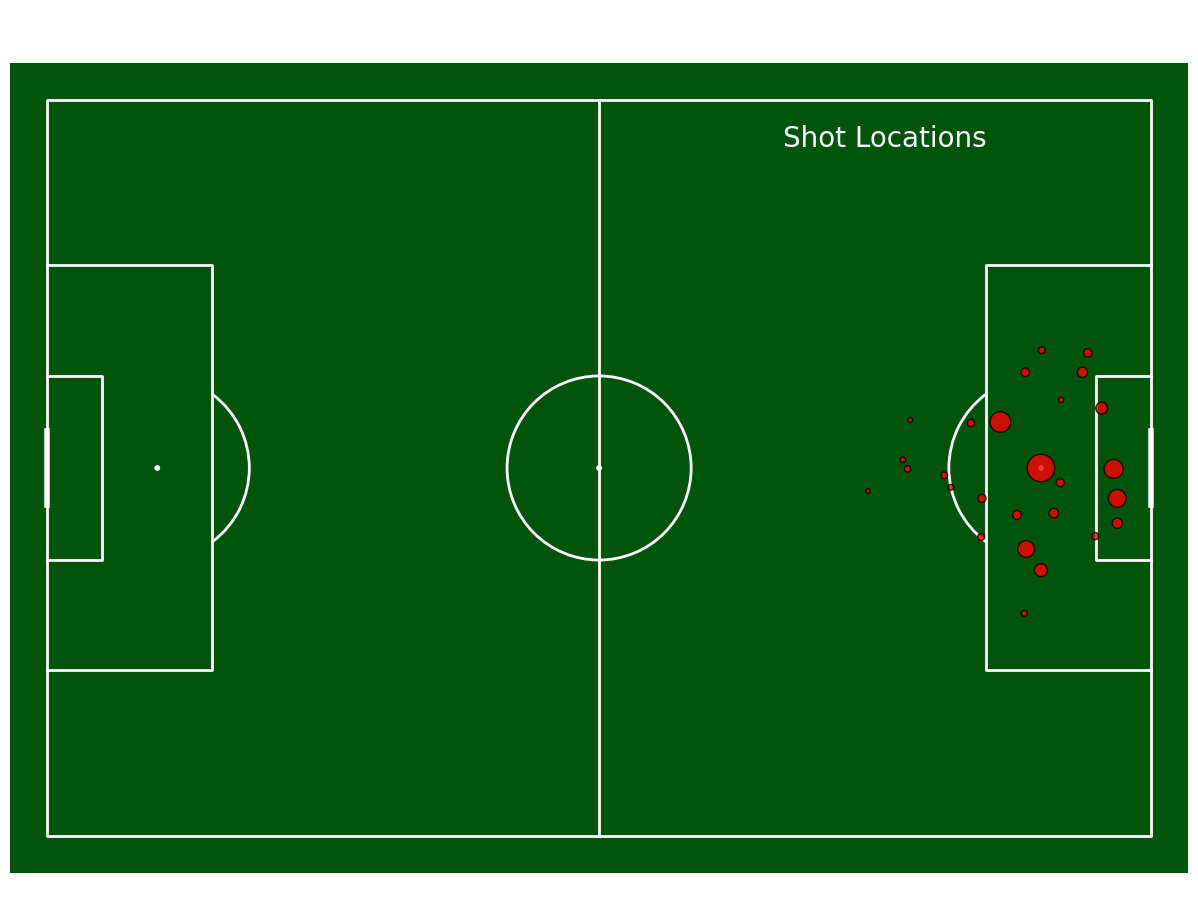

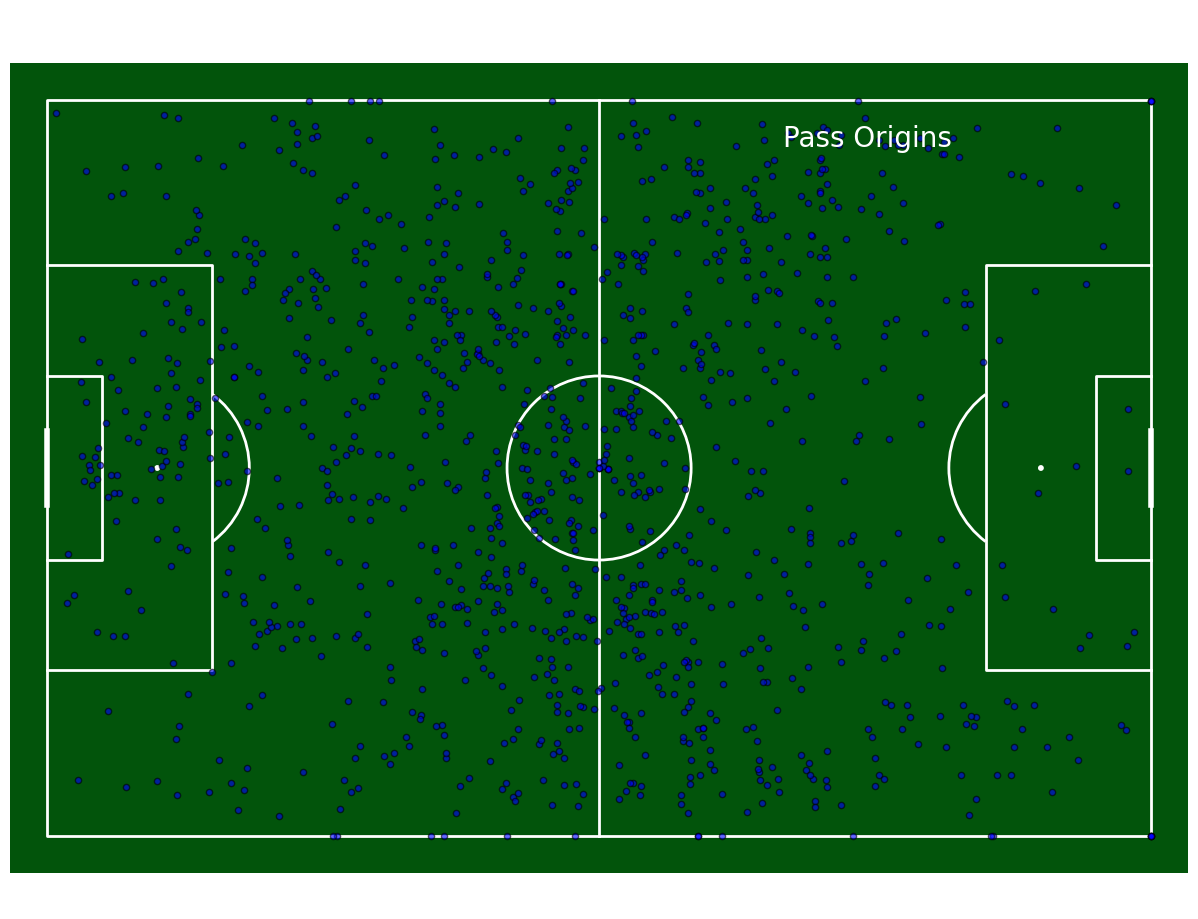

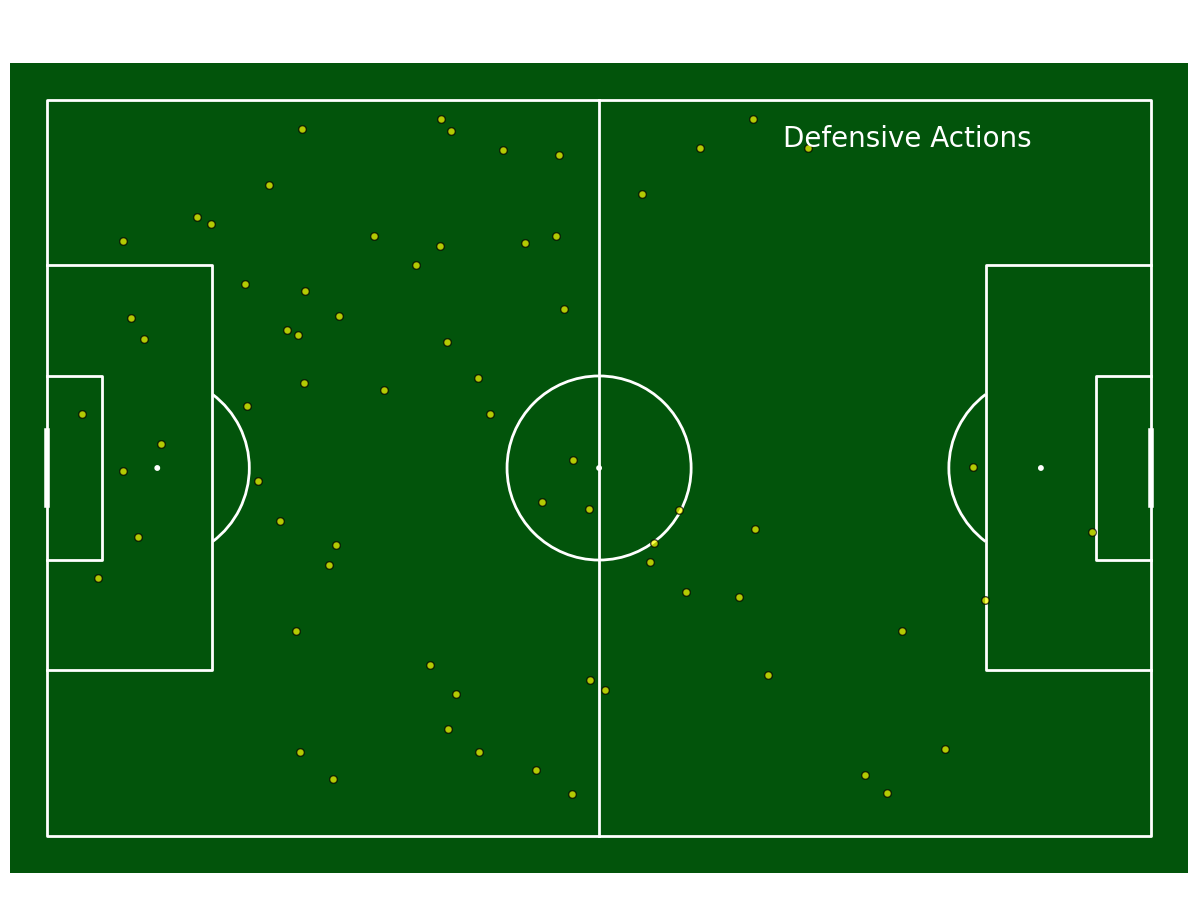

In [101]:
# prompt: Spatial Analysis:
# Explore the spatial distribution of events on the pitch, such as shot locations, pass origins, and defensive actions.
# Utilize scatter plot in stadium map visualization the spatial patterns and identify areas of interest.

import matplotlib.pyplot as plt
# Spatial Analysis: Shot Locations
pitch = Pitch(line_color='white', pitch_color='#02540b')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

shots = df_event[df_event['type_name'] == 'Shot']
pitch.scatter(shots.x, shots.y, s=shots.shot_statsbomb_xg * 500,
             c='red', edgecolors='black', alpha=0.8, ax=ax['pitch'])
ax['pitch'].text(80, 5, 'Shot Locations', color='white', size=20)
plt.show()

# Spatial Analysis: Pass Origins
pitch = Pitch(line_color='white', pitch_color='#02540b')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

passes = df_event[df_event['type_name'] == 'Pass']
pitch.scatter(passes.x, passes.y, s=20,
             c='blue', edgecolors='black', alpha=0.6, ax=ax['pitch'])
ax['pitch'].text(80, 5, 'Pass Origins', color='white', size=20)
plt.show()

# Spatial Analysis: Defensive Actions (Tackles and Interceptions)
pitch = Pitch(line_color='white', pitch_color='#02540b')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

defensive_actions = df_event[(df_event['type_name'] == 'Duel') | (df_event['type_name'] == 'Interception')]
pitch.scatter(defensive_actions.x, defensive_actions.y, s=30,
             c='yellow', edgecolors='black', alpha=0.7, ax=ax['pitch'])
ax['pitch'].text(80, 5, 'Defensive Actions', color='white', size=20)
plt.show()
